In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 1.

Рассмотрим функцию f на отрезке [1, 15]:
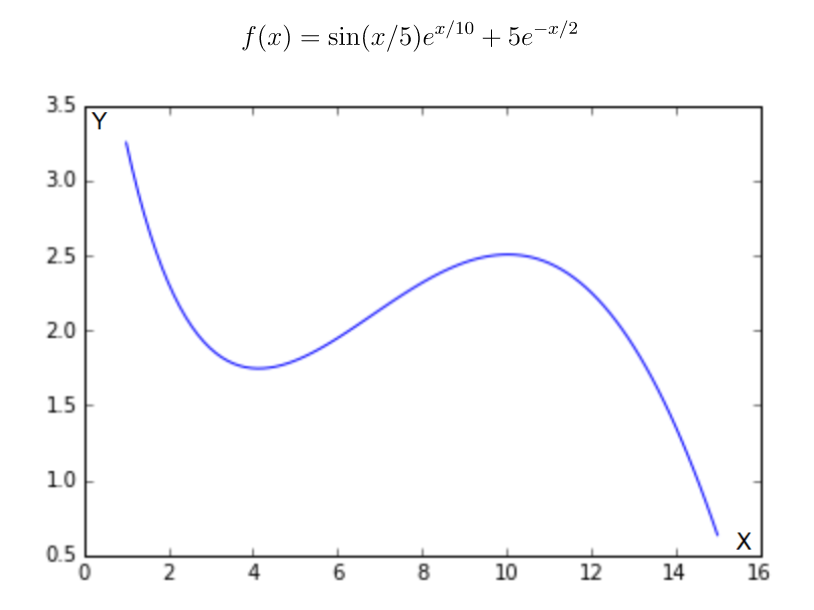

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. Мы хотим приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w0 + w1 x + w2 x2 + ... + wn xn) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w0, ..., wn можно определить из следующей системы линейных уравнений:

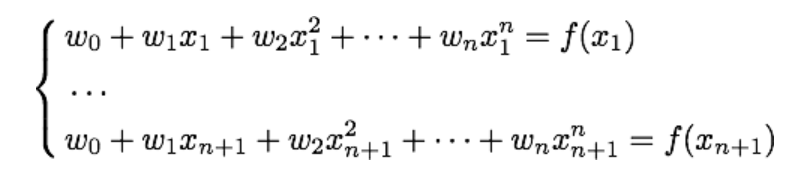

где через x1, ..., xn, xn + 1 обозначены точки, через которые проходит многочлен, а через f(x1), ..., f(xn), f(xn + 1) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1.    Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции numpy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2.    Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3.    Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w0, w1, w2, w3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можно произвести округление до второго знака (т.е. до числа вида 0.42).


In [7]:
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

1. Многочлен 1-ой степени\
w0 + w1*x1 = f(x1)\
w0 + w1*x2 = f(x2)

In [8]:
A = np.array([[1, 1], [1, 15]])
b = np.array([f(1), f(15)])
w = np.linalg.solve(A, b)
w

array([ 3.43914511, -0.18692825])

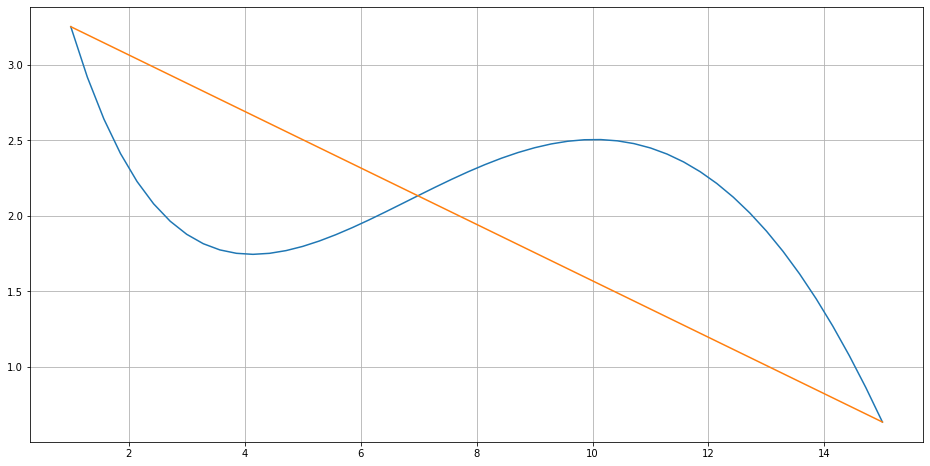

In [9]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(16, 8))
plt.plot(grid, f(grid))
plt.grid()

x = np.array([1, 15])
plt.plot(x, w[0]+w[1]*x)

Синяя кривая - функция, оранжевая прямая - приближение. Как мы видим линейное приближение не подходит для нашей функции.

2. Многочлен 2-ой степени\
w0 + w1*x1 + w2*$x1^2$= f(x1)\
w0 + w1*x2 + w2*$x2^2$= f(x2)\
w0 + w1*x3 + w2*$x3^2$= f(x3)

In [10]:
x = np.array([1, 8, 15])
A = np.array([[1, 1, 1], x, x*x]).T
b = f(x)
w = np.linalg.solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

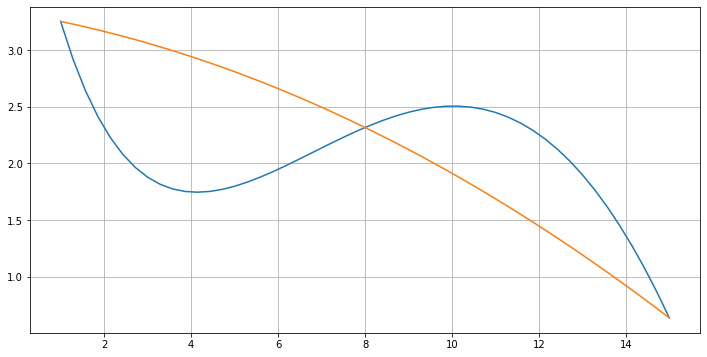

In [11]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(12, 6))
plt.plot(grid, f(grid))
plt.grid()

plt.plot(grid, w[0]+w[1]*grid+w[2]*grid*grid)

Синяя кривая - функция, оранжевая прямая - приближение. Как мы видим квадратичное приближение тоже не подходит для нашей функции.

3. Многочлен 3-ей степени\
w0 + w1x1 + w2$x1^2$ + w3$x1^3$ = f(x1)\
w0 + w1x2 + w2$x2^2$ + w3$x2^3$ = f(x2)\
w0 + w1x3 + w2$x3^2$ + w3$x3^3$ = f(x3)\
w0 + w1x4 + w2$x4^2$ + w3$x4^3$ = f(x4)

In [12]:
x = np.array([1, 4, 10, 15])
A = np.array([[1, 1, 1, 1], x, x*x, x*x*x]).T
b = f(x)
w = np.linalg.solve(A, b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

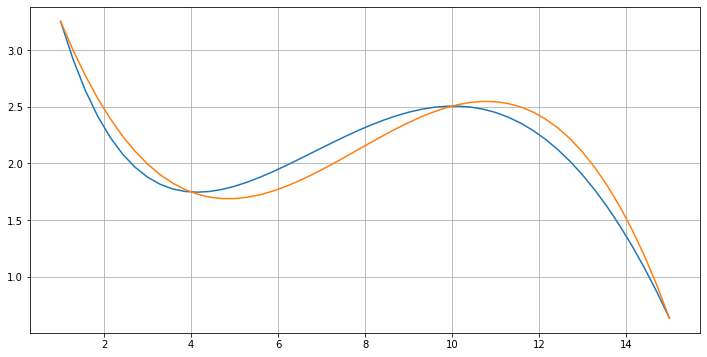

In [13]:
grid = np.linspace(1, 15, num=50)
plt.figure(figsize=(12, 6))
plt.plot(grid, f(grid))
plt.grid()

plt.plot(grid, w[0]+w[1]*grid+w[2]*grid*grid+w[3]*grid*grid*grid)

Синяя кривая - функция, оранжевая прямая - приближение. Как мы видим кубическое приближение хорошо показывает вид нашей функции.

In [14]:
print('Коэффициенты кубического приближения:', np.round_(w, decimals=2))

Коэффициенты кубического приближения: [ 4.36 -1.3   0.19 -0.01]


## Задача 2.

Есть два вектора одинаковой длины: x и y. Надо найти количество позиций, для которых элементы в обоих векторах ненулевые. Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент.

In [16]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])
x0=np.where(x!=0)[0]
y0=np.where(y!=0)[0]

intersection=x0[np.in1d(x0,y0)]
print(intersection.size)

setx0=np.unique(x0)
sety0=np.unique(y0)
a = np.union1d(setx0,sety0)
print (a.size)

2
6


## Задача 3.

В векторе x надо повторить каждый элемент N раз подряд.

In [17]:
arr = [1, 2, 0]
N = 3
np.repeat(arr, N)

array([1, 1, 1, 2, 2, 2, 0, 0, 0])

## Задача 4.

В векторе x надо найти максимальный элемент среди тех, перед которыми стоит ноль.

In [18]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])
zero = x==0
ans = max(x[1:][zero[:-1]])
ans

11

## Задача 5.

В векторе x надо заполнить каждый нулевой элемент предыдущим ненулевым значением.

## Задача 6.

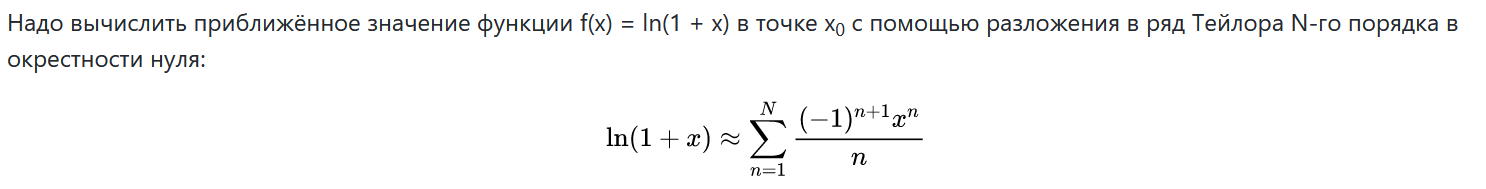

In [24]:
x = sum (np.matlib.repmat(-x,1,n))
x

AttributeError: module 'numpy' has no attribute 'matlib'

## Задача 7.

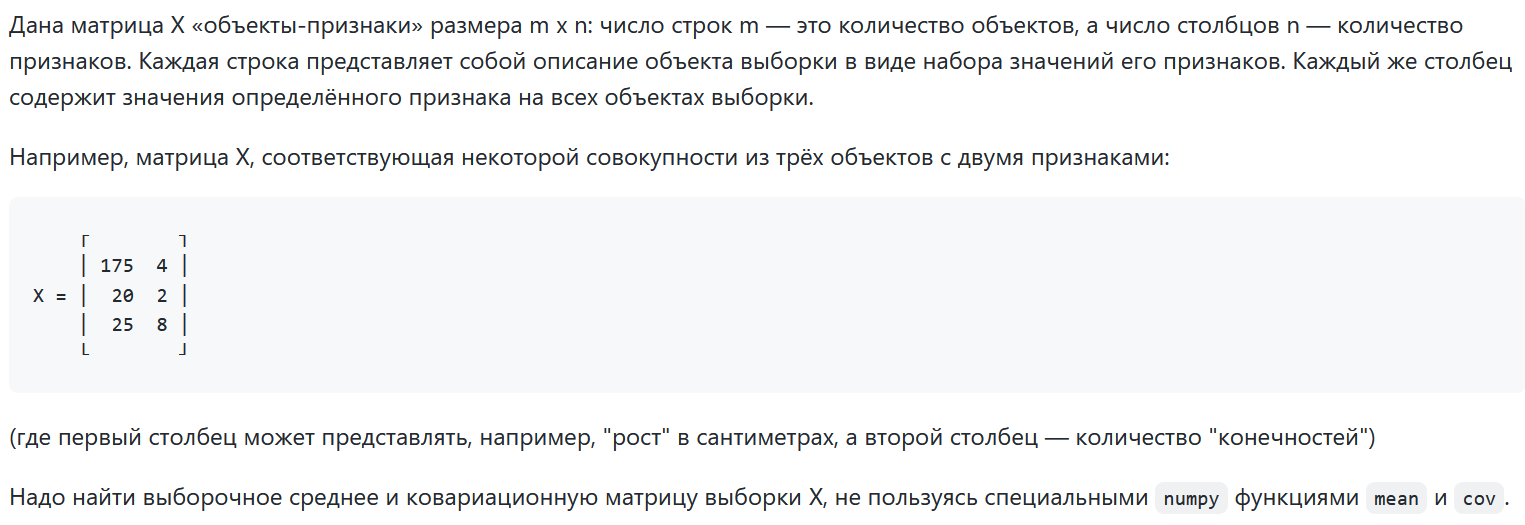

In [22]:
X = np.array([[175, 4], [20, 2], [25, 8]])
sums = X.sum(axis=0)
m=1
m, n = X.shape
mean = sums/m
print(mean)

[73.33333333  4.66666667]


In [23]:
dev = X - np.reshape(np.repeat(mean, m), (n,-1)).T
Q = np.dot(dev.T, dev)/(m-1)
print(Q)

[[7758.33333333  -43.33333333]
 [ -43.33333333    9.33333333]]
